In [23]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter

from ipywidgets import interact,interactive,fixed,interact_manual
import ipywidgets as widgets

In [24]:
plt.rcParams['text.usetex'] = True 
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath} \usepackage[cm]{sfmath}"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'cm'
plt.rcParams.update({'font.size': 20})

In [25]:
def create_XY(xcol,ycol):
    meshx=data[:,xcol].reshape(rpoints,cpoints)
    meshy=data[:,ycol].reshape(rpoints,cpoints)
    return meshx,meshy

In [26]:
def create_cdXY(xcol,ycol):
    meshx,meshy=create_XY(xcol,ycol)
    return meshx[:,0:cpoints-1],meshy[:,0:cpoints-1]
def create_rdXY(xcol,ycol):
    meshx,meshy=create_XY(xcol,ycol)
    return meshx[0:rpoints-1,:],meshy[0:rpoints-1,:]

In [27]:
def plot_2dx(xcol,ycol,xc_col,yc_col,cticks,lwr,upr,mar_type=0,flag=1,clable='',lfilter=0,ylim=[0,0],xlim=[0,0],nmar=[],delta=0,axis=1):
    X,Y=create_cdXY(xcol,ycol)
    
    data_y=data[:,yc_col].reshape(rpoints,cpoints)
    data_x=data[:,xc_col].reshape(rpoints,cpoints)
    
    if(axis==1):
        rd=0
        cd=1
        X,Y=create_cdXY(xcol,ycol)
    else:
        rd=1
        cd=0
        X,Y=create_rdXY(xcol,ycol)
    data_z=(np.diff(data_y,axis=axis)/np.diff(data_x,axis=axis)).reshape(rpoints-rd,cpoints-cd)
    data_z=abs(gaussian_filter(data_z,sigma=lfilter))
    
    mean_data=np.mean(data_z)
    max_data=1.5*mean_data
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    g = plt.contourf(X,Y,data_z,np.linspace(lwr,upr,100), cmap='seismic',extend='both',zorder=-2)
    plt.gca().set_rasterization_zorder(-1)


    cb = plt.colorbar(g,ticks=cticks)
    cb.ax.set_title(clable, size =20 )
    if(flag==0):
        delta=2*delta
        datav1=data[:,4].reshape(rpoints,cpoints)
        datav2=data[:,5].reshape(rpoints,cpoints)
        for ki in range(len(nmar)):
            i_ar=[]
            j_ar=[]
            iq_ar=[]
            jq_ar=[]
            for i in range(rpoints):
                for j in range(cpoints):
                    v1=datav1[i,j]
                    v2=datav2[i,j]
                    if(mar_type==2):
                        if (delta/nmar[ki]-1<(v1-v2)<delta/nmar[ki]+1):
                            i_ar.append(i)
                            j_ar.append(j)
                        if (delta/nmar[ki]-1<(v1)<delta/nmar[ki]+1):
                            i_ar.append(i)
                            j_ar.append(j)

                        if(abs(v1)>50 and abs(v2)>50):
                            if (v2-.1<-v1<v2+.1):
                                iq_ar.append(i)
                                jq_ar.append(j)

            i1=data[:,4].reshape(rpoints,cpoints)
            i2=data[:,5].reshape(rpoints,cpoints)
            plt.plot(i1[i_ar,j_ar],i2[i_ar,j_ar],'.g',axes=ax,markersize=0.5)
            plt.plot(i1[iq_ar,jq_ar],i2[iq_ar,jq_ar],'--g',linestyle='--', dashes=(5, 10),axes=ax,markersize=0.5)
    ax.set_aspect(1.0)
    return g

In [33]:
data=np.loadtxt('IV_Char.txt')
scaling=np.array([1*1e6,1*1e6,1e6,1e6])
for i in range(4):
    data[:,i]=scaling[i]*data[:,i]

In [34]:
cpoints=500
rpoints=500

([<matplotlib.axis.YTick at 0x20b670e9760>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

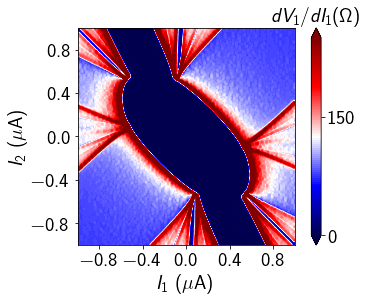

In [35]:
plot_2dx(0,1,0,2,axis=0,lwr=0,upr=250,cticks=(0,150,300,450),clable=r'${dV_1/dI_1 (\Omega)}$',flag=1,nmar=[2,4,6],mar_type=2,delta=145,lfilter=2)
plt.xlabel(r'${I_1}$ ($\mu$A)',fontsize=20)
plt.ylabel(r'${I_2}$ ($\mu$A)',fontsize=20)
plt.xticks(ticks=(-0.8,-0.4,0,0.4,0.8), fontsize=20)
plt.yticks(ticks=(-0.8,-0.4,0,0.4,0.8), fontsize=20)


In [44]:
data=np.loadtxt('IV_Char_torch.txt')
scaling=np.array([1*1e6,1*1e6,1e6,1e6])
for i in range(4):
    data[:,i]=scaling[i]*data[:,i]

In [45]:
cpoints=500
rpoints=500

([<matplotlib.axis.YTick at 0x20b71d6f3a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

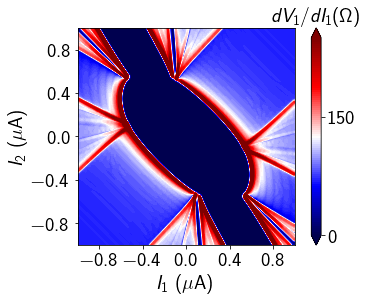

In [46]:
plot_2dx(0,1,0,2,axis=0,lwr=0,upr=250,cticks=(0,150,300,450),clable=r'${dV_1/dI_1 (\Omega)}$',flag=1,nmar=[2,4,6],mar_type=2,delta=145,lfilter=2)
plt.xlabel(r'${I_1}$ ($\mu$A)',fontsize=20)
plt.ylabel(r'${I_2}$ ($\mu$A)',fontsize=20)
plt.xticks(ticks=(-0.8,-0.4,0,0.4,0.8), fontsize=20)
plt.yticks(ticks=(-0.8,-0.4,0,0.4,0.8), fontsize=20)